In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.shape

(10886, 12)

In [6]:
df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Axes: ylabel='Frequency'>

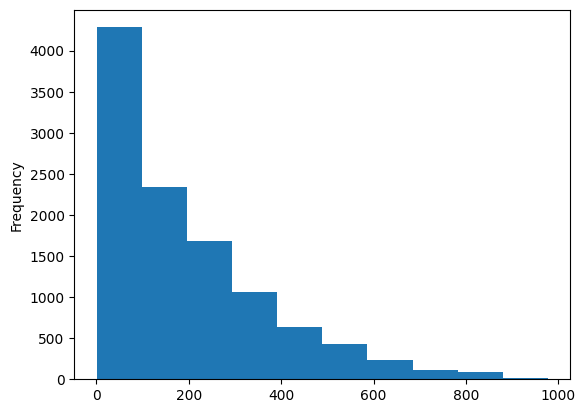

In [8]:
df['count'].plot(kind='hist')

<Axes: ylabel='Frequency'>

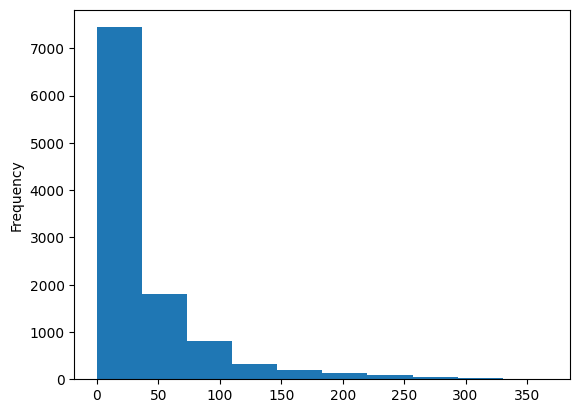

In [9]:
df['casual'].plot(kind='hist')

<Axes: ylabel='Frequency'>

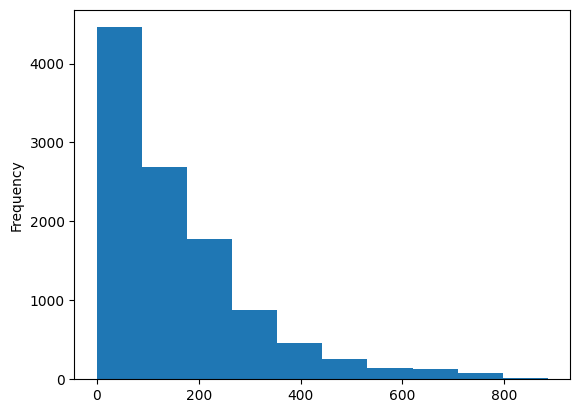

In [10]:
df['registered'].plot(kind='hist')

In [11]:
df['log_count']=np.log1p(df['count'])

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.693147


In [13]:
df['hour']=df['datetime'].dt.hour
df['day_of_week']=df['datetime'].dt.dayofweek
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,hour,day_of_week,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.833213,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.713572,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.496508,2,5,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.639057,3,5,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.693147,4,5,1,2011


<Axes: xlabel='hour', ylabel='count'>

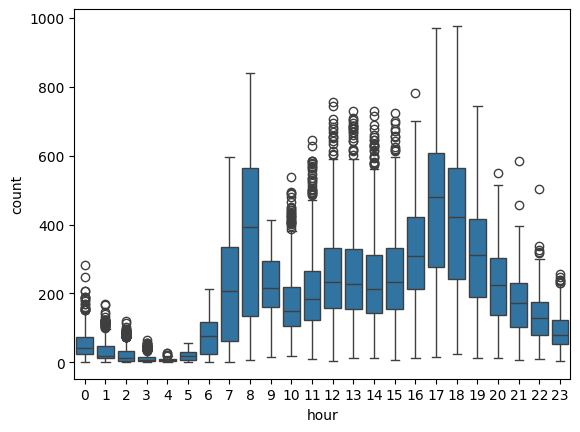

In [15]:
sns.boxplot(data=df,y=df['count'],x=df['hour'])

<Axes: xlabel='day_of_week', ylabel='count'>

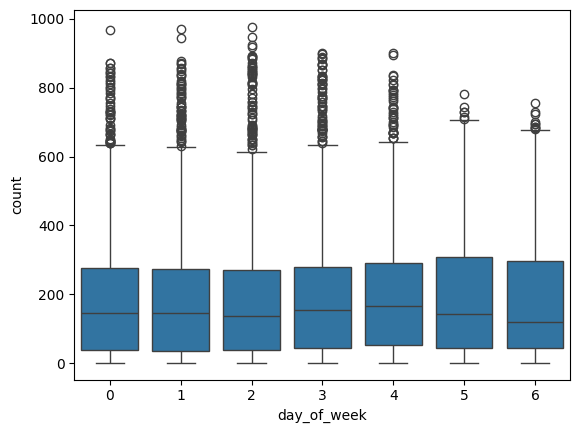

In [16]:
sns.boxplot(data=df,x=df['day_of_week'],y=df['count'])

<Axes: xlabel='temp', ylabel='count'>

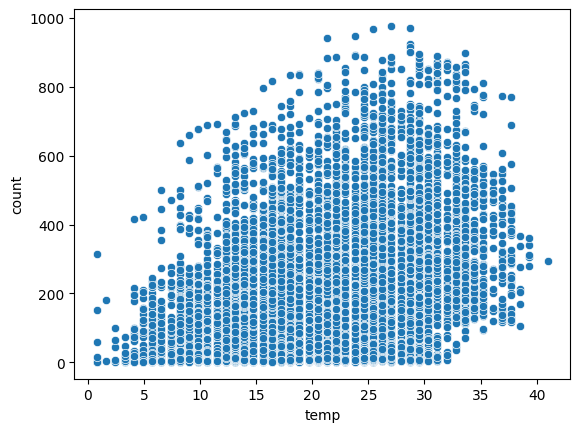

In [17]:
sns.scatterplot(data=df,x=df['temp'],y=df['count'])

In [18]:
df['is_weekend']=df['day_of_week'].apply(lambda x:1 if x>=5 else 0)

In [19]:
# Encodes the 24-hour cycle
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Encodes the 12-month cycle
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12.0)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12.0)

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,log_count,hour,day_of_week,month,year,is_weekend,hour_sin,hour_cos,month_sin,month_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2.833213,0,5,1,2011,1,0.000000,1.000000,0.5,0.866025
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,3.713572,1,5,1,2011,1,0.258819,0.965926,0.5,0.866025
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,3.496508,2,5,1,2011,1,0.500000,0.866025,0.5,0.866025
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2.639057,3,5,1,2011,1,0.707107,0.707107,0.5,0.866025
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0.693147,4,5,1,2011,1,0.866025,0.500000,0.5,0.866025


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
df['tempxhumidity']=df['temp']*df['humidity']
numeric_features=['temp','atemp','humidity','windspeed','tempxhumidity','hour_sin','hour_cos','day_of_week']
cat_features=['season','weather']

In [23]:
x = df.drop(columns=['casual', 'registered', 'datetime', 'log_count'])
y = df['log_count']


In [24]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: log_count, Length: 10886, dtype: float64

In [25]:
n=StandardScaler()
c=OneHotEncoder()
from xgboost import XGBRegressor

In [26]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',n,numeric_features),
        ('cat',c,cat_features)
    ]
)

In [27]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        objective='reg:squarederror',
        random_state=42,
    ))
])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
model.score(x_test,y_test)

0.9298864227117608

In [31]:
y_pred_log=model.predict(x_test)

In [32]:
y_pred=np.expm1(y_pred_log)

In [33]:
from sklearn.metrics import mean_squared_log_error
y_test_orig=np.expm1(y_test)
rmsle=np.sqrt(mean_squared_log_error(y_test_orig,y_pred))
print(f"Root mean squared logarithmic Error: {rmsle}")

Root mean squared logarithmic Error: 0.37990678276127


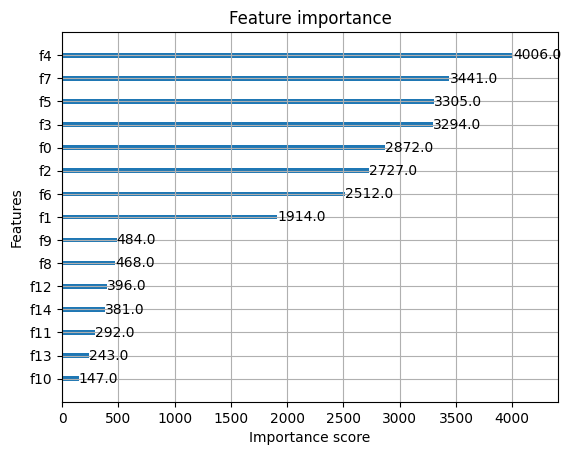

In [34]:
from xgboost import plot_importance
xgb_model=model.named_steps['model']
plot_importance(xgb_model,max_num_features=15)
plt.show()

In [35]:
type(model)

sklearn.pipeline.Pipeline

In [36]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

In [37]:
param_grid = {
    'model__n_estimators': [200, 500, 800],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [4, 6, 8],
    'model__min_child_weight': [1, 3, 5],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 1, 5],
    'model__reg_alpha': [0, 0.1, 0.5],
    'model__reg_lambda': [1, 1.5, 2],
    'model__booster': ['gbtree', 'dart']
}


In [38]:
from sklearn.metrics import mean_squared_error, make_scorer
def rmsle_scorer_func(y_true_log, y_pred_log):
    y_true=np.expm1(y_true_log)
    y_pred=np.expm1(y_pred_log)

    y_pred[y_pred<0]=0
    if np.any(np.np.isinf(y_pred) or np.isnan(y_pred)):
        return np.inf
    msle=mean_squared_log_error(y_true,y_pred)
    rmsle=np.sqrt(msle)
    return rmsle
rmsle_scorer=make_scorer(rmsle_scorer_func,greater_is_better=False)

In [59]:
from sklearn.model_selection import TimeSeriesSplit

In [61]:
tscv=TimeSeriesSplit(n_splits=3)

In [62]:
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=30, 
    scoring=rmsle_scorer,
    cv=tscv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
try:
    search.fit(x_train, y_train)
    print("\nBest params found:", search.best_params_)
    print("Best score (Negative RMSLE):", search.best_score_)
    print("Best positive RMSLE found:", -search.best_score_)
    best_model = search.best_estimator_
except Exception as e:
    print(f"RandomizedSearchCV failed with error: {e}")




Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Hrishi\Desktop\projects\mini projects\Ride-sharing-demand-forecast\bike\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Best params found: {'model__subsample': 0.6, 'model__reg_lambda': 1, 'model__reg_alpha': 0, 'model__n_estimators': 200, 'model__min_child_weight': 1, 'model__max_depth': 8, 'model__learning_rate': 0.01, 'model__gamma': 1, 'model__colsample_bytree': 1.0, 'model__booster': 'gbtree'}
Best score (Negative RMSLE): nan
Best positive RMSLE found: nan


In [40]:
import joblib

joblib.dump(search, 'model.joblib')

print("model saved successfully!")

model saved successfully!


In [41]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(x):
    print("TRAIN:",train_index[:5],"...","TEST,test_index[:5]")

TRAIN: [0 1 2 3 4] ... TEST,test_index[:5]
TRAIN: [0 1 2 3 4] ... TEST,test_index[:5]
TRAIN: [0 1 2 3 4] ... TEST,test_index[:5]
TRAIN: [0 1 2 3 4] ... TEST,test_index[:5]
TRAIN: [0 1 2 3 4] ... TEST,test_index[:5]


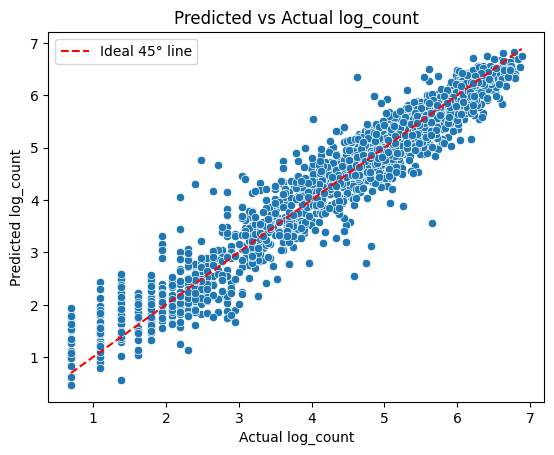

In [42]:
sns.scatterplot(x=y_test,y=y_pred_log)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal 45° line')
plt.xlabel("Actual log_count")
plt.ylabel("Predicted log_count")
plt.title("Predicted vs Actual log_count")
plt.legend()
plt.show()

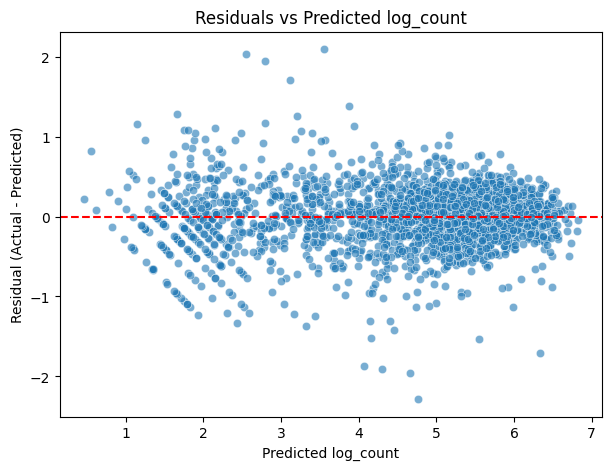

In [43]:

residuals = y_test - y_pred_log

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred_log, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log_count")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted log_count")
plt.show()


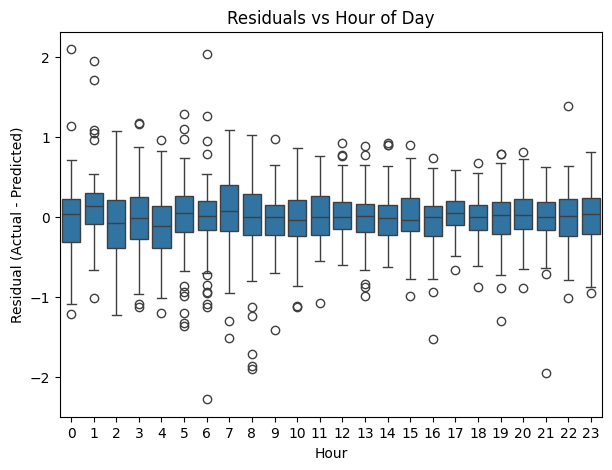

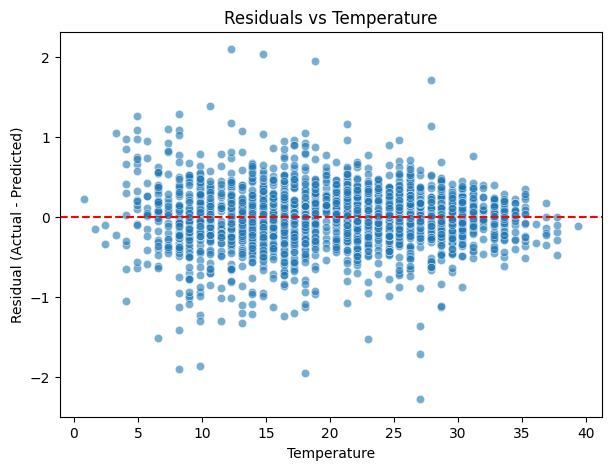

In [44]:

plt.figure(figsize=(7, 5))
sns.boxplot(x=df.loc[y_test.index, 'hour'], y=residuals)
plt.title("Residuals vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df.loc[y_test.index, 'temp'], y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()


In [45]:
test=pd.read_csv('test.csv')

In [46]:
test['datetime']=pd.to_datetime(test['datetime'])

In [47]:
test['hour']=test['datetime'].dt.hour
test['day_of_week']=test['datetime'].dt.day_of_week
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year

In [48]:
test['hour_sin'] = np.sin(2 * np.pi * test['hour'] / 24.0)
test['hour_cos'] = np.cos(2 * np.pi * test['hour'] / 24.0)
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12.0)
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12.0)

In [49]:
test['tempxhumidity']=test['temp']*test['humidity']

In [50]:
numeric_features = ['temp', 'atemp', 'humidity', 'windspeed', 'tempxhumidity', 
                    'hour_sin', 'hour_cos', 'day_of_week'] 

cat_features = ['season', 'weather']

In [51]:
X_test_final = test[numeric_features + cat_features]

In [52]:
test_pred_log=model.predict(X_test_final)

In [53]:
test_pred=np.expm1(test_pred_log)

In [54]:
test_pred[test_pred<0]=0

In [55]:
submission=pd.DataFrame({'datetime':test['datetime'],'count':test_pred.round().astype(int)})
submission

,datetime,count
0,2011-01-20 00:00:00,19
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,4
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3
...,...,...
6488,2012-12-31 19:00:00,155
6489,2012-12-31 20:00:00,97
6490,2012-12-31 21:00:00,71
6491,2012-12-31 22:00:00,60


In [56]:
submission['datetime']=submission['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [57]:
submission

,datetime,count
0,2011-01-20 00:00:00,19
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,4
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3
...,...,...
6488,2012-12-31 19:00:00,155
6489,2012-12-31 20:00:00,97
6490,2012-12-31 21:00:00,71
6491,2012-12-31 22:00:00,60


In [58]:
submission.to_csv('submission.csv',index=False)